## Importing Packages

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass
from collections import defaultdict
import operator
from functools import reduce
from operator import itemgetter
from collections import Counter
import re
%matplotlib inline

## Reading the data

In [191]:
data=pd.read_csv('TrainsDataSet0.csv',delimiter=';')
pd.set_option('display.max_columns', 500)
data

Number_of_cars  Number_of_different_loads  num_wheels1 length1      shape1  \
0               5                          4            2    long    openrect   
1               4                          3            2   short     ushaped   
2               4                          2            2   short    openrect   
3               5                          2            2   short    opentrap   
4               4                          3            2   short  dblopnrect   
5               3                          2            2    long  closedrect   
6               4                          2            2   short  dblopnrect   
7               3                          2            3    long  closedrect   
8               5                          2            2   short    opentrap   
9               3                          1            2   short     ushaped   

   num_loads1 load_shape1  num_wheels2 length2      shape2  num_loads2  \
0           3  rectanglod            2   short    slopetop           1   
1           1   trianglod            2   short    opentrap           1   
2           1   circlelod            2   short     hexagon           1   
3           1   trianglod            2   short  dblopnrect           1   
4           1   trianglod            3    long  closedrect           1   
5           3   circlelod            2   short    openrect           1   
6           1   circlelod            2   short     ushaped           1   
7           1  rectanglod            2   short     ushaped           1   
8           1   circlelod            2    long   jaggedtop           1   
9           1  rectanglod            2    long    openrect           2   

  load_shape2 num_wheels3 length3      shape3 num_loads3 load_shape3  \
0   trianglod           3    long    openrect          1  hexagonlod   
1  rectanglod           2   short  closedrect          2   circlelod   
2   trianglod           3    long  closedrect          1   trianglod   
3   trianglod           2   short     ellipse          1  rectanglod   
4  rectanglod           2   short  closedrect          1   circlelod   
5   trianglod           -       -           -          -           -   
6   trianglod           2    long   jaggedtop          0           -   
7   circlelod           -       -           -          -           -   
8  rectanglod           2   short    openrect          1  rectanglod   
9  rectanglod           -       -           -          -           -   

  num_wheels4 length4    shape4 num_loads4 load_shape4  \
0           2   short  openrect          1   circlelod   
1           -       -         -          -           -   
2           -       -         -          -           -   
3           2   short  openrect          1  rectanglod   
4           -       -         -          -           -   
5           -       -         -          -           -   
6           -       -         -          -           -   
7           -       -         -          -           -   
8           2   short  opentrap          1   circlelod   
9           -       -         -          -           -   

   Rectangle_next_to_rectangle  Rectangle_next_to_triangle  \
0                            0                           1   
1                            0                           1   
2                            0                           0   
3                            1                           1   
4                            0                           1   
5                            0                           0   
6                            0                           0   
7                            0                           0   
8                            1                           0   
9                            1                           0   

   Rectangle_next_to_hexagon  Rectangle_next_to_circle  \
0                          0                         0   
1                          0                         1   
2      

In [192]:
len(data.columns)

33

## Data Set attributes description

Attributes: 33 <br>
  1 . Number_of_cars (integer in [3-5])<br>
  2 . Number_of_different_loads (integer in [1-4])<br>
  3-22: 5 attributes for each of cars 2 through 5: (20 attributes total)<br>
    - num_wheels (integer in [2-3])
    - length (short or long)    
    - shape (closedrect, dblopnrect, ellipse, engine, hexagon,
             jaggedtop, openrect, opentrap, slopetop, ushaped)
    - num_loads (integer in [0-3])
    - load_shape (circlelod, hexagonlod, rectanglod, trianglod)
  23-32: 10 Boolean attributes describing whether 2 types of loads are on
         adjacent cars of the train<br>
    - Rectangle_next_to_rectangle (0 if false, 1 if true)
    - Rectangle_next_to_triangle (0 if false, 1 if true)
    - Rectangle_next_to_hexagon (0 if false, 1 if true)
    - Rectangle_next_to_circle (0 if false, 1 if true)
    - Triangle_next_to_triangle (0 if false, 1 if true)
    - Triangle_next_to_hexagon (0 if false, 1 if true)
    - Triangle_next_to_circle (0 if false, 1 if true)
    - Hexagon_next_to_hexagon (0 if false, 1 if true)
    - Hexagon_next_to_circle (0 if false, 1 if true)
    - Circle_next_to_circle (0 if false, 1 if true)
  33 . Class attribute (east or west)
  
  The number of cars vary between 3 and 5.  Therefore, attributes referring
  to properties of cars that do not exist (such as the 5 attriubutes for
  the "5th" car when the train has fewer than 5 cars) are assigned a value
  of "-".



# Preprocessing data

<h3 id="identify_missing_values">Identify missing values</h3>

In [193]:
#converting missing values to np.nap
data.replace("-", np.nan, inplace = True)

In [194]:
data

Number_of_cars  Number_of_different_loads  num_wheels1 length1      shape1  \
0               5                          4            2    long    openrect   
1               4                          3            2   short     ushaped   
2               4                          2            2   short    openrect   
3               5                          2            2   short    opentrap   
4               4                          3            2   short  dblopnrect   
5               3                          2            2    long  closedrect   
6               4                          2            2   short  dblopnrect   
7               3                          2            3    long  closedrect   
8               5                          2            2   short    opentrap   
9               3                          1            2   short     ushaped   

   num_loads1 load_shape1  num_wheels2 length2      shape2  num_loads2  \
0           3  rectanglod            2   short    slopetop           1   
1           1   trianglod            2   short    opentrap           1   
2           1   circlelod            2   short     hexagon           1   
3           1   trianglod            2   short  dblopnrect           1   
4           1   trianglod            3    long  closedrect           1   
5           3   circlelod            2   short    openrect           1   
6           1   circlelod            2   short     ushaped           1   
7           1  rectanglod            2   short     ushaped           1   
8           1   circlelod            2    long   jaggedtop           1   
9           1  rectanglod            2    long    openrect           2   

  load_shape2 num_wheels3 length3      shape3 num_loads3 load_shape3  \
0   trianglod           3    long    openrect          1  hexagonlod   
1  rectanglod           2   short  closedrect          2   circlelod   
2   trianglod           3    long  closedrect          1   trianglod   
3   trianglod           2   short     ellipse          1  rectanglod   
4  rectanglod           2   short  closedrect          1   circlelod   
5   trianglod         NaN     NaN         NaN        NaN         NaN   
6   trianglod           2    long   jaggedtop          0         NaN   
7   circlelod         NaN     NaN         NaN        NaN         NaN   
8  rectanglod           2   short    openrect          1  rectanglod   
9  rectanglod         NaN     NaN         NaN        NaN         NaN   

  num_wheels4 length4    shape4 num_loads4 load_shape4  \
0           2   short  openrect          1   circlelod   
1         NaN     NaN       NaN        NaN         NaN   
2         NaN     NaN       NaN        NaN         NaN   
3           2   short  openrect          1  rectanglod   
4         NaN     NaN       NaN        NaN         NaN   
5         NaN     NaN       NaN        NaN         NaN   
6         NaN     NaN       NaN        NaN         NaN   
7         NaN     NaN       NaN        NaN         NaN   
8           2   short  opentrap          1   circlelod   
9         NaN     NaN       NaN        NaN         NaN   

   Rectangle_next_to_rectangle  Rectangle_next_to_triangle  \
0                            0                           1   
1                            0                           1   
2                            0                           0   
3                            1                           1   
4                            0                           1   
5                            0                           0   
6                            0                           0   
7                            0                           0   
8                            1                           0   
9                            1                           0   

   Rectangle_next_to_hexagon  Rectangle_next_to_circle  \
0                          0                         0   
1                          0                         1   
2      

<h3 >Identify and handle missing values</h3>

<h4>Count missing values in each column :</h4>

In [195]:
for column in data.columns.values.tolist():
    print(column)
    print (data[column].isnull().sum())
    print("")    

Number_of_cars
0

Number_of_different_loads
0

num_wheels1
0

length1
0

shape1
0

num_loads1
0

load_shape1
0

num_wheels2
0

length2
0

shape2
0

num_loads2
0

load_shape2
0

num_wheels3
3

length3
3

shape3
3

num_loads3
3

load_shape3
4

num_wheels4
7

length4
7

shape4
7

num_loads4
7

load_shape4
7

Rectangle_next_to_rectangle
0

Rectangle_next_to_triangle
0

Rectangle_next_to_hexagon
0

Rectangle_next_to_circle
0

Triangle_next_to_triangle
0

Triangle_next_to_hexagon
0

Triangle_next_to_circle
0

Hexagon_next_to_hexagon
0

Hexagon_next_to_circle
0

Circle_next_to_circle
0

class
0



missing values are founded in these columns :

- num_wheels3
- length3
- shape3
- num_loads3
- load_shape3
- num_wheels4
- length4
- shape4
- num_loads4
- load_shape4

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

deleting column with same values :

In [196]:
data = data.drop(columns="Circle_next_to_circle")
data = data.drop(columns="Rectangle_next_to_hexagon")
data = data.drop(columns="Hexagon_next_to_hexagon")

### Dropping column with more than 70% are missing

num_wheels4/length4/shape4/num_loads4/load_shape4

In [197]:
data = data.drop(columns="num_wheels4")
data = data.drop(columns="length4")
data = data.drop(columns="shape4")
data = data.drop(columns="num_loads4")
data = data.drop(columns="load_shape4")

In [198]:
data

Number_of_cars  Number_of_different_loads  num_wheels1 length1      shape1  \
0               5                          4            2    long    openrect   
1               4                          3            2   short     ushaped   
2               4                          2            2   short    openrect   
3               5                          2            2   short    opentrap   
4               4                          3            2   short  dblopnrect   
5               3                          2            2    long  closedrect   
6               4                          2            2   short  dblopnrect   
7               3                          2            3    long  closedrect   
8               5                          2            2   short    opentrap   
9               3                          1            2   short     ushaped   

   num_loads1 load_shape1  num_wheels2 length2      shape2  num_loads2  \
0           3  rectanglod            2   short    slopetop           1   
1           1   trianglod            2   short    opentrap           1   
2           1   circlelod            2   short     hexagon           1   
3           1   trianglod            2   short  dblopnrect           1   
4           1   trianglod            3    long  closedrect           1   
5           3   circlelod            2   short    openrect           1   
6           1   circlelod            2   short     ushaped           1   
7           1  rectanglod            2   short     ushaped           1   
8           1   circlelod            2    long   jaggedtop           1   
9           1  rectanglod            2    long    openrect           2   

  load_shape2 num_wheels3 length3      shape3 num_loads3 load_shape3  \
0   trianglod           3    long    openrect          1  hexagonlod   
1  rectanglod           2   short  closedrect          2   circlelod   
2   trianglod           3    long  closedrect          1   trianglod   
3   trianglod           2   short     ellipse          1  rectanglod   
4  rectanglod           2   short  closedrect          1   circlelod   
5   trianglod         NaN     NaN         NaN        NaN         NaN   
6   trianglod           2    long   jaggedtop          0         NaN   
7   circlelod         NaN     NaN         NaN        NaN         NaN   
8  rectanglod           2   short    openrect          1  rectanglod   
9  rectanglod         NaN     NaN         NaN        NaN         NaN   

   Rectangle_next_to_rectangle  Rectangle_next_to_triangle  \
0                            0                           1   
1                            0                           1   
2                            0                           0   
3                            1                           1   
4                            0                           1   
5                            0                           0   
6                            0                           0   
7                            0                           0   
8                            1                           0   
9                            1                           0   

   Rectangle_next_to_circle  Triangle_next_to_triangle  \
0                         0                          0   
1                         1                          0   
2                         0                          1   
3                         0                          1   
4                         1                          0   
5                         0                          0   
6                         0                          0   
7                         1                          0   
8                         1                          0   
9                         0                          0   

   Triangle_next_to_hexagon  Triangle_next_to_circle  Hexagon_next_to_circle  \
0                         1                        0                       1   
1                    

In [199]:
len(data.columns)

25

### Replace by frequency:

since we have categorical values , the most common fix to deal with missing values is to replace it by frequency :

we can use values_counts() to display counts about a column to see the most frequent value :

In [200]:
data['num_wheels3'].value_counts()

2    5
3    2
Name: num_wheels3, dtype: int64

In [201]:
#to find the most frequence value
data['num_wheels3'].value_counts().idxmax()

'2'

In [202]:
data['length3'].value_counts()

short    4
long     3
Name: length3, dtype: int64

In [203]:
data['shape3'].value_counts()

closedrect    3
openrect      2
jaggedtop     1
ellipse       1
Name: shape3, dtype: int64

In [204]:
data['num_loads3'].value_counts()

1    5
2    1
0    1
Name: num_loads3, dtype: int64

In [205]:
data['load_shape3'].value_counts()

rectanglod    2
circlelod     2
trianglod     1
hexagonlod    1
Name: load_shape3, dtype: int64

In [206]:
data['num_wheels3'].replace(np.nan, 2, inplace=True)
data['length3'].replace(np.nan, 'short', inplace=True)
data['shape3'].replace(np.nan, 'closedrect', inplace=True)
data['num_loads3'].replace(np.nan, 5, inplace=True)
data['load_shape3'].replace(np.nan, 'rectanglod', inplace=True)

In [207]:
data

Number_of_cars  Number_of_different_loads  num_wheels1 length1      shape1  \
0               5                          4            2    long    openrect   
1               4                          3            2   short     ushaped   
2               4                          2            2   short    openrect   
3               5                          2            2   short    opentrap   
4               4                          3            2   short  dblopnrect   
5               3                          2            2    long  closedrect   
6               4                          2            2   short  dblopnrect   
7               3                          2            3    long  closedrect   
8               5                          2            2   short    opentrap   
9               3                          1            2   short     ushaped   

   num_loads1 load_shape1  num_wheels2 length2      shape2  num_loads2  \
0           3  rectanglod            2   short    slopetop           1   
1           1   trianglod            2   short    opentrap           1   
2           1   circlelod            2   short     hexagon           1   
3           1   trianglod            2   short  dblopnrect           1   
4           1   trianglod            3    long  closedrect           1   
5           3   circlelod            2   short    openrect           1   
6           1   circlelod            2   short     ushaped           1   
7           1  rectanglod            2   short     ushaped           1   
8           1   circlelod            2    long   jaggedtop           1   
9           1  rectanglod            2    long    openrect           2   

  load_shape2 num_wheels3 length3      shape3 num_loads3 load_shape3  \
0   trianglod           3    long    openrect          1  hexagonlod   
1  rectanglod           2   short  closedrect          2   circlelod   
2   trianglod           3    long  closedrect          1   trianglod   
3   trianglod           2   short     ellipse          1  rectanglod   
4  rectanglod           2   short  closedrect          1   circlelod   
5   trianglod           2   short  closedrect          5  rectanglod   
6   trianglod           2    long   jaggedtop          0  rectanglod   
7   circlelod           2   short  closedrect          5  rectanglod   
8  rectanglod           2   short    openrect          1  rectanglod   
9  rectanglod           2   short  closedrect          5  rectanglod   

   Rectangle_next_to_rectangle  Rectangle_next_to_triangle  \
0                            0                           1   
1                            0                           1   
2                            0                           0   
3                            1                           1   
4                            0                           1   
5                            0                           0   
6                            0                           0   
7                            0                           0   
8                            1                           0   
9                            1                           0   

   Rectangle_next_to_circle  Triangle_next_to_triangle  \
0                         0                          0   
1                         1                          0   
2                         0                          1   
3                         0                          1   
4                         1                          0   
5                         0                          0   
6                         0                          0   
7                         1                          0   
8                         1                          0   
9                         0                          0   

   Triangle_next_to_hexagon  Triangle_next_to_circle  Hexagon_next_to_circle  \
0                         1                        0                       1   
1                    

In [208]:
data.isna().sum()

Number_of_cars                 0
Number_of_different_loads      0
num_wheels1                    0
length1                        0
shape1                         0
num_loads1                     0
load_shape1                    0
num_wheels2                    0
length2                        0
shape2                         0
num_loads2                     0
load_shape2                    0
num_wheels3                    0
length3                        0
shape3                         0
num_loads3                     0
load_shape3                    0
Rectangle_next_to_rectangle    0
Rectangle_next_to_triangle     0
Rectangle_next_to_circle       0
Triangle_next_to_triangle      0
Triangle_next_to_hexagon       0
Triangle_next_to_circle        0
Hexagon_next_to_circle         0
class                          0
dtype: int64

In [209]:
data

Number_of_cars  Number_of_different_loads  num_wheels1 length1      shape1  \
0               5                          4            2    long    openrect   
1               4                          3            2   short     ushaped   
2               4                          2            2   short    openrect   
3               5                          2            2   short    opentrap   
4               4                          3            2   short  dblopnrect   
5               3                          2            2    long  closedrect   
6               4                          2            2   short  dblopnrect   
7               3                          2            3    long  closedrect   
8               5                          2            2   short    opentrap   
9               3                          1            2   short     ushaped   

   num_loads1 load_shape1  num_wheels2 length2      shape2  num_loads2  \
0           3  rectanglod            2   short    slopetop           1   
1           1   trianglod            2   short    opentrap           1   
2           1   circlelod            2   short     hexagon           1   
3           1   trianglod            2   short  dblopnrect           1   
4           1   trianglod            3    long  closedrect           1   
5           3   circlelod            2   short    openrect           1   
6           1   circlelod            2   short     ushaped           1   
7           1  rectanglod            2   short     ushaped           1   
8           1   circlelod            2    long   jaggedtop           1   
9           1  rectanglod            2    long    openrect           2   

  load_shape2 num_wheels3 length3      shape3 num_loads3 load_shape3  \
0   trianglod           3    long    openrect          1  hexagonlod   
1  rectanglod           2   short  closedrect          2   circlelod   
2   trianglod           3    long  closedrect          1   trianglod   
3   trianglod           2   short     ellipse          1  rectanglod   
4  rectanglod           2   short  closedrect          1   circlelod   
5   trianglod           2   short  closedrect          5  rectanglod   
6   trianglod           2    long   jaggedtop          0  rectanglod   
7   circlelod           2   short  closedrect          5  rectanglod   
8  rectanglod           2   short    openrect          1  rectanglod   
9  rectanglod           2   short  closedrect          5  rectanglod   

   Rectangle_next_to_rectangle  Rectangle_next_to_triangle  \
0                            0                           1   
1                            0                           1   
2                            0                           0   
3                            1                           1   
4                            0                           1   
5                            0                           0   
6                            0                           0   
7                            0                           0   
8                            1                           0   
9                            1                           0   

   Rectangle_next_to_circle  Triangle_next_to_triangle  \
0                         0                          0   
1                         1                          0   
2                         0                          1   
3                         0                          1   
4                         1                          0   
5                         0                          0   
6                         0                          0   
7                         1                          0   
8                         1                          0   
9                         0                          0   

   Triangle_next_to_hexagon  Triangle_next_to_circle  Hexagon_next_to_circle  \
0                         1                        0                       1   
1                    

### Encoding the Categorial data

In [210]:

d = {
	'long':1,
	'short':2,
	'closedrect':1,
	'dblopnrect':2,
	'ellipse':3,
	'engine':4,
	'hexagon':5,
	'jaggedtop':6,
	'openrect':7,
	'opentrap':8,
	'slopetop':9,
	'ushaped':10,
	'circlelod':1,
	'hexagonlod':2,
	'rectanglod':3,
	'trianglod':4,
    'east':1,
    'west':0,
    }
df = data.replace(d)

## Visualising Data

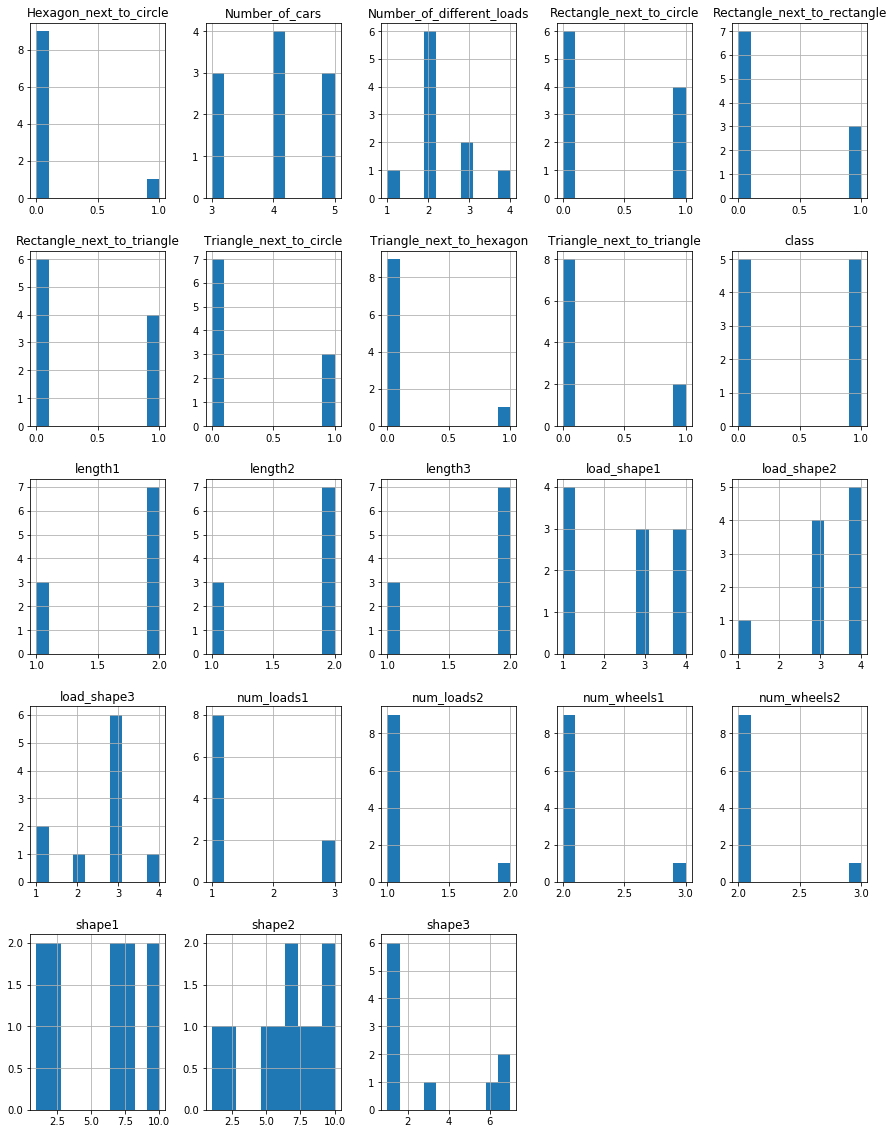

In [211]:
df.hist(figsize=(15,20))
plt.show()

#### Splitting the data into training and testing data

In [212]:
X=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].values
X=X.astype('int')
X

array([[ 5,  4,  2,  1,  7,  3,  3,  2,  2,  9,  1,  4,  3,  1,  7,  1,
         2,  0,  1,  0,  0,  1,  0,  1],
       [ 4,  3,  2,  2, 10,  1,  4,  2,  2,  8,  1,  3,  2,  2,  1,  2,
         1,  0,  1,  1,  0,  0,  0,  0],
       [ 4,  2,  2,  2,  7,  1,  1,  2,  2,  5,  1,  4,  3,  1,  1,  1,
         4,  0,  0,  0,  1,  0,  1,  0],
       [ 5,  2,  2,  2,  8,  1,  4,  2,  2,  2,  1,  4,  2,  2,  3,  1,
         3,  1,  1,  0,  1,  0,  0,  0],
       [ 4,  3,  2,  2,  2,  1,  4,  3,  1,  1,  1,  3,  2,  2,  1,  1,
         1,  0,  1,  1,  0,  0,  0,  0],
       [ 3,  2,  2,  1,  1,  3,  1,  2,  2,  7,  1,  4,  2,  2,  1,  5,
         3,  0,  0,  0,  0,  0,  1,  0],
       [ 4,  2,  2,  2,  2,  1,  1,  2,  2, 10,  1,  4,  2,  1,  6,  0,
         3,  0,  0,  0,  0,  0,  1,  0],
       [ 3,  2,  3,  1,  1,  1,  3,  2,  2, 10,  1,  1,  2,  2,  1,  5,
         3,  0,  0,  1,  0,  0,  0,  0],
       [ 5,  2,  2,  2,  8,  1,  1,  2,  1,  6,  1,  3,  2,  2,  7,  1,
         3,  1,  0,  1, 

In [213]:
Y=df.iloc[:,24].values
Y=Y.astype('int')
Y

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

using sickit-learn framework to split data :

In [214]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test , Y_train, Y_test=tts(X,Y,test_size=0.3,random_state=100)

In [215]:
X_train[0].shape

(24,)

In [216]:
Y_train

array([0, 1, 1, 1, 1, 0, 0])

## Building the Naive Bayes Model

In [217]:
#fonctions qui calcule pour chque labels le pourcentage ou le nombre de répition d'une donnéé

from collections import defaultdict
def doc_priors(labels):
    doc_priors = defaultdict(float)

    for label in labels:
        doc_priors[label] = sum(1 for d in labels if d == label) / len(labels)

    return doc_priors

In [218]:
#test du fonctions doc_priors

labels = Y
prior = doc_priors(labels)
prior

defaultdict(float, {1: 0.5, 0: 0.5})

In [219]:
#fonctions pour calculé les probabilé conditionel pour chaque attribut

def con_prob_calc(train, labels):
    
    # un dictionnaire défaut qui retenus 0 si le key n'existe pas et
    # qui va contenir les probabiltés de chaque donnéé
    cond_prob = defaultdict(lambda: defaultdict(float))
    
    # itération sur la liste des class (labels) qui sont soit 0 east ou 1 west
    for label in set(labels):
    
        label_tokens = []
        for i, doc in enumerate(train):
            
            # i est l'indice de la colone
            # doc est la vecteur
             
            if labels[i] == label:
                
                 # pour chaque elément de train , on prend le vecteur doc on la copie dans label_tokens
                label_tokens.extend(doc)

        for token in set(label_tokens):
            
            # Calcule de la probabilités conditionel pour une label : (token count ) / (total count)
            cond_prob[label][token] = label_tokens.count(token) / len(label_tokens) 

    return cond_prob

In [220]:
#dictionnaire pour retenus les probabilités conditionel 
#qui prend en argument les vecteur du dataSet X et la class d'apprtenance Y

cond_prob = con_prob_calc(X, Y)
cond_prob

defaultdict(<function __main__.con_prob_calc.<locals>.<lambda>()>,
            {0: defaultdict(float,
                         {0: 0.25,
                          1: 0.25,
                          2: 0.25,
                          3: 0.11666666666666667,
                          4: 0.025,
                          5: 0.03333333333333333,
                          6: 0.016666666666666666,
                          7: 0.025,
                          8: 0.008333333333333333,
                          10: 0.025}),
             1: defaultdict(float,
                         {0: 0.19166666666666668,
                          1: 0.3,
                          2: 0.24166666666666667,
                          3: 0.09166666666666666,
                          4: 0.09166666666666666,
                          5: 0.025,
                          7: 0.025,
                          8: 0.016666666666666666,
                          9: 0.008333333333333333,
                          10: 0.00833

In [221]:
cond_prob.keys()
print(cond_prob.keys())

dict_keys([0, 1])


In [222]:
#calcule du produit pour calculé la probabilité
#en utilisant la fonctions reduce qui retenus le produit des element de l iterable
def product(iterable):
    return reduce(operator.mul, iterable, 1)

#fonctions qui calcule la probabilié pour une vecteur cond_prob , en utilisant la probabilité conditionel et le con_priors
def post_prob(test, cond_prob, doc_priors):
    prob_predicted = defaultdict(float)
    for label in cond_prob.keys():
        
        # pour chaque class, calculé la probabilité conditionel 
        # en se basant sur la focntions doc_priors et les nombre de répetition du token t dans le test
        prob_predicted[label] = doc_priors[label] * product(cond_prob[label][t] for t in test)
    
    return prob_predicted


In [223]:
#test du résultat en utilisant une vecteur qui qui déja dans notre DataSet 

test_x = [ 4,  3,  2,  2, 10,  1,  4,  2,  2,  8,  1,  3,  2,  2,  1,  2, 1,  0,  1,  1,  0,  0,  0,  0]
print(len(test_x))
#calcul de la probabilité  pour chaque class
prob_predicted = post_prob(test_x, cond_prob, prior)

print(prob_predicted)

print("########################################")
print('{0:.50f}'.format(prob_predicted[0]))
print('{0:.50f}'.format(prob_predicted[1]))


24
defaultdict(<class 'float'>, {0: 1.2895034834164783e-20, 1: 4.45103496078075e-20})
########################################
0.00000000000000000001289503483416478335382678285862
0.00000000000000000004451034960780750038621790356975


In [224]:
# selectionnez la valeur maximal des probabilités retenus 
label, prob = max(prob_predicted.items(),
                  key=itemgetter(1))
print("la classe prédicté est :", label)

la classe prédicté est : 1


# Calcule du score de précision

In [225]:
predictions = []
for vect in X_test:
    test_x = vect.tolist()
    prob_predicted = post_prob(test_x, cond_prob, prior)
    label, prob = max(prob_predicted.items(),
    key=itemgetter(1))
    predictions=np.array(label)
ans = (np.sum(predictions==Y_test))/float(X_test.shape[0])
print()
print()
print("Le score de précision est :",str(ans))



Le score de précision est : 0.6666666666666666


## Model using sklearn

In [226]:
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [227]:
validation_size = 0.30

In [234]:
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, 
                                                                                Y, 
                                                                                test_size=validation_size, 
                                                                                random_state=seed)
X_train=X_train.astype('int')
Y_train=Y_train.astype('int')
X_validation=X_validation.astype('int')
Y_validation=Y_validation.astype('int')

X_train

array([[ 4,  2,  2,  2,  7,  1,  1,  2,  2,  5,  1,  4,  3,  1,  1,  1,
         4,  0,  0,  0,  1,  0,  1,  0],
       [ 4,  3,  2,  2, 10,  1,  4,  2,  2,  8,  1,  3,  2,  2,  1,  2,
         1,  0,  1,  1,  0,  0,  0,  0],
       [ 3,  1,  2,  2, 10,  1,  3,  2,  1,  7,  2,  3,  2,  2,  1,  5,
         3,  1,  0,  0,  0,  0,  0,  0],
       [ 3,  2,  3,  1,  1,  1,  3,  2,  2, 10,  1,  1,  2,  2,  1,  5,
         3,  0,  0,  1,  0,  0,  0,  0],
       [ 5,  2,  2,  2,  8,  1,  4,  2,  2,  2,  1,  4,  2,  2,  3,  1,
         3,  1,  1,  0,  1,  0,  0,  0],
       [ 4,  2,  2,  2,  2,  1,  1,  2,  2, 10,  1,  4,  2,  1,  6,  0,
         3,  0,  0,  0,  0,  0,  1,  0],
       [ 4,  3,  2,  2,  2,  1,  4,  3,  1,  1,  1,  3,  2,  2,  1,  1,
         1,  0,  1,  1,  0,  0,  0,  0]])

In [235]:
Y_train

array([1, 1, 0, 0, 1, 0, 1])

## Training the model :

In [236]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, Y_train)


prediction_de_validation_naive = y_pred.predict(X_validation)

print("Score de précision :")
print(accuracy_score(Y_validation, prediction_de_validation_naive))
print()

print("confusion_matrix:")
print(confusion_matrix(Y_validation, prediction_de_validation_naive))
print()

print("classification_report:")
print(classification_report(Y_validation, prediction_de_validation_naive))
print()

Score de précision :
1.0

confusion_matrix:
[[2 0]
 [0 1]]

classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3




score de précision égale à 1 càd il a predicté correctemment la direction des 3 trains qui sont dans la validation test

## Prediction

In [243]:
X_new=np.array([[ 4,  3,  2,  2, 10,  1,  4,  2,  2,  8,  1,  3,  2,  2,  1,  2, 1,  0,  1,  1,  0,  0,  0,  0],
                [ 4,  3,  2,  2, 10,  1,  4,  2,  2,  8,  1,  3,  2,  2,  1,  2,1,  0,  1,  1,  0,  0,  0,  0]])
print("X_new.shape: {}".format(X_new.shape))
prediction_naive = y_pred.predict(X_new)
print("Prédiction de la classe : {}".format(prediction_naive))

X_new.shape: (2, 24)
Prédiction de la classe : [1 1]
